In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from matplotlib import font_manager, rc
font_path='C:/Windows/Fonts/malgunbd.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [34]:
df=pd.read_csv('../../data/normal_simulation.csv')
tem = df[['heart_rate1']].copy()
tem.set_index(df['update_time'], inplace=True)
tem

,heart_rate1
update_time,
2023-10-01 00:00:00,72
2023-10-01 00:10:00,69
2023-10-01 00:20:00,92
2023-10-01 00:30:00,84
2023-10-01 00:40:00,85
...,...
2023-10-10 08:10:00,83
2023-10-10 08:20:00,74
2023-10-10 08:30:00,83


#### Decomposition
> 분기 데이터의 경우 k=4, 월별 데이터 k=12, 주별 데이터 k=7

###### tem_copy 주기 4,7,12별로 뭐가 다른지 보기 (addictive)

#### 가법 모형 시계열 분해 주기 별로 보기

C:\Users\jun99\AppData\Local\Temp\ipykernel_33764\2245699939.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(3, 1, 2)
C:\Users\jun99\AppData\Local\Temp\ipykernel_33764\2245699939.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(3,1,3)
C:\Users\jun99\AppData\Local\Temp\ipykernel_33764\2245699939.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


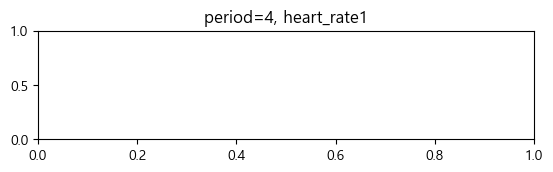

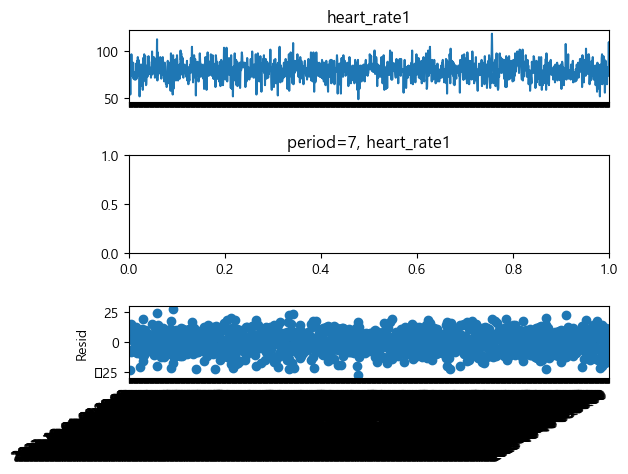

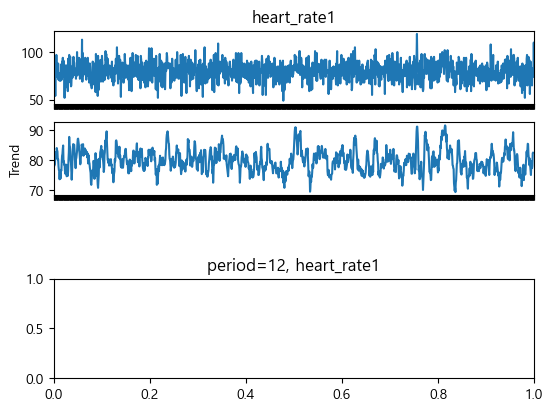

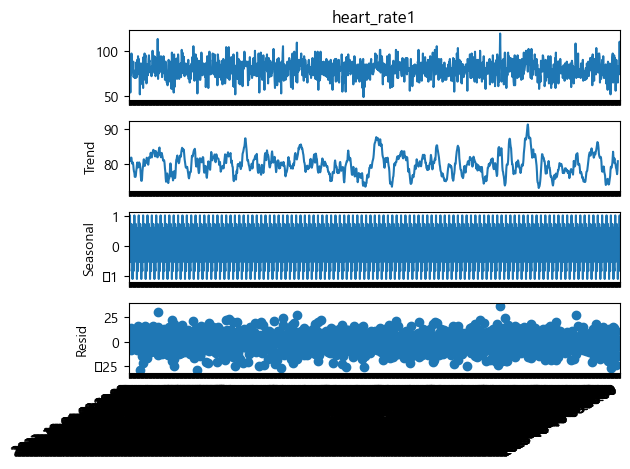

In [8]:
# Convert 'update_time' to datetime
# tem.index = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H', errors='ignore')
# print(tem.head())

# Reset the index to make 'update_time' a regular column
# tem.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
ax1 = plt.subplot(3, 1, 1)
result1 = seasonal_decompose(tem['heart_rate1'], model='additive', period=4)
plt.title('period=4, heart_rate1')
result1.plot()
plt.gcf().autofmt_xdate()
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# second plot
ax2 = plt.subplot(3, 1, 2)
result2 = seasonal_decompose(tem['heart_rate1'], model='additive', period=7)
plt.title('period=7, heart_rate1')
result2.plot()
plt.gcf().autofmt_xdate()
# ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# third plot
ax3 = plt.subplot(3,1,3)
result3 = seasonal_decompose(tem['heart_rate1'], model='additive', period=12)
plt.title('period=12, heart_rate1')
result3.plot()
plt.gcf().autofmt_xdate()
# ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

###### tem_copy 주기 4,7,12별로 뭐가 다른지 보기 (multiplicative)

In [ ]:
# # Perform seasonal decomposition
# result1 = seasonal_decompose(tem_copy['heart_rate'], model='multiplicative', period=4)
# plt.title('period=4, heart_rate')
# result1.plot()
# plt.gcf().autofmt_xdate()

# result2 = seasonal_decompose(tem_copy['heart_rate'], model='multiplicative', period=7)
# plt.title('period=7, heart_rate')
# result2.plot()
# plt.gcf().autofmt_xdate()

# result3 = seasonal_decompose(tem_copy['heart_rate'], model='multiplicative', period=12)
# plt.title('period=12, heart_rate')
# result3.plot()
# plt.gcf().autofmt_xdate()

# plt.show()

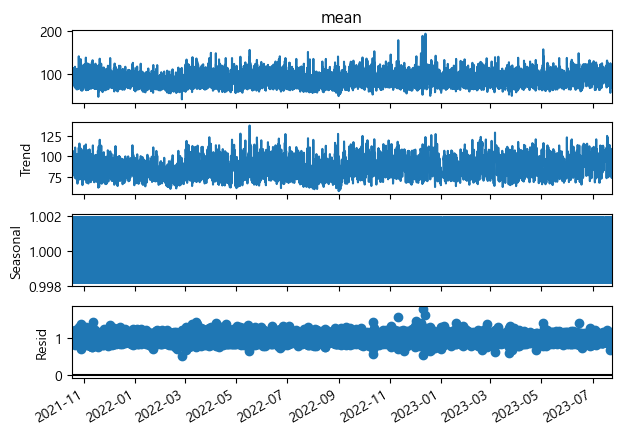

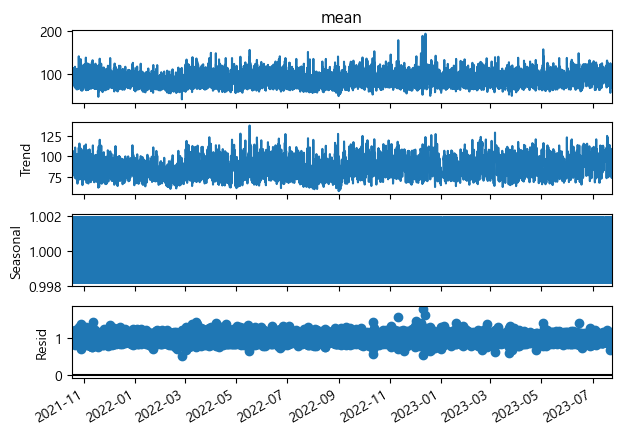

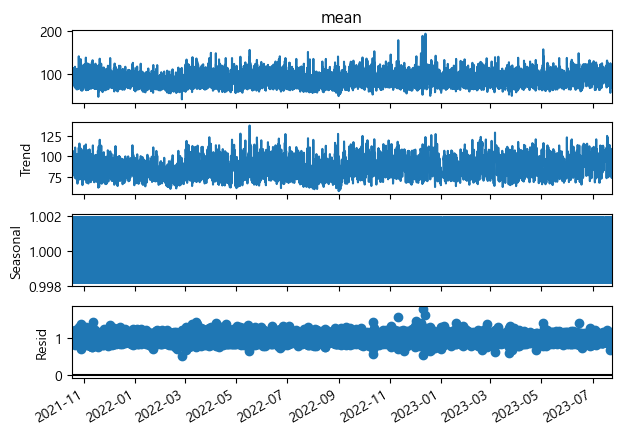

In [72]:
# Perform seasonal decomposition
result1 = seasonal_decompose(daily_stats['mean'], model='multiplicative', period=4)
result1.plot()
plt.gcf().autofmt_xdate()

result2 = seasonal_decompose(daily_stats['mean'], model='multiplicative', period=4)
result2.plot()
plt.gcf().autofmt_xdate()

result3 = seasonal_decompose(daily_stats['mean'], model='multiplicative', period=4)
result3.plot()
plt.gcf().autofmt_xdate()

plt.show()

#### tem stats

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\holt-winters\holt\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


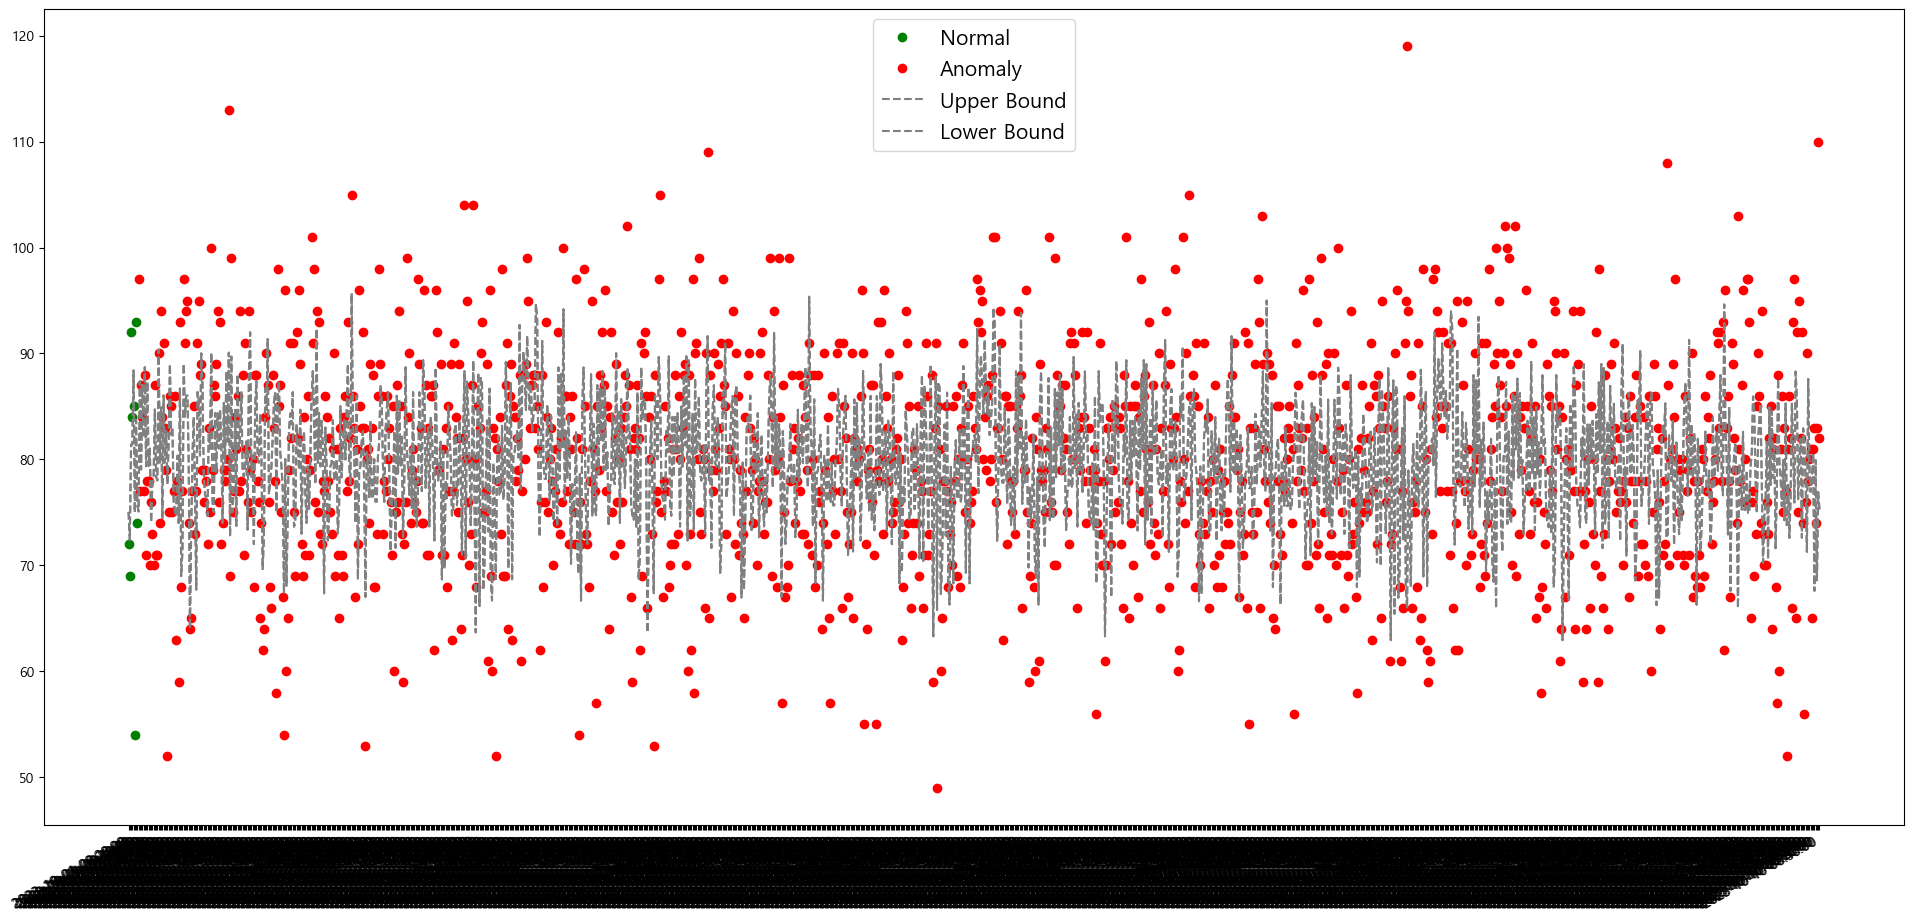

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ES 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
model = ExponentialSmoothing(
    tem['heart_rate1'][:1007], trend='additive', seasonal='additive', seasonal_periods=365).fit()
    
prediction = model.predict(
    start=tem.index[0], end=tem.index[-1])

"""Brutlag Algorithm"""
PERIOD = 7        # The given time series has seasonal_period=12
GAMMA = 0  # the seasonility component
SF = 1.96          # brutlag scaling factor for the confidence bands.
UB = []            # upper bound or upper confidence band
LB = []            # lower bound or lower confidence band

# 실측치와 예측치를 비교하는 자료구조
difference_array = []
dt = []
difference_table = {"actual": tem, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

# brutlag 알고리즘
for i in range(len(prediction)):
    diff = tem.iloc[i]-prediction.iloc[i]
    if i < PERIOD:
        dt.append(GAMMA*abs(diff))
    else:
        dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

# 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
    difference_array.append(diff)
    UB.append(prediction[i]+SF*dt[i])
    LB.append(prediction[i]-SF*dt[i])
    
"""Classification of data points as either normal or anomaly"""
normal = []
normal_date = []
anomaly = []
anomaly_date = []

# 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
for i in range(len(tem.index)):
    if ((UB[i] <= tem.iloc[i]).bool() or (LB[i] >= tem.iloc[i]).bool()) and i > PERIOD:
        anomaly_date.append(tem.index[i])
        anomaly.append(tem.iloc[i][0])
    else:
        normal_date.append(tem.index[i])
        normal.append(tem.iloc[i][0])
        
anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
anomaly.set_index('date', inplace=True)
normal = pd.DataFrame({"date": normal_date, "value": normal})
normal.set_index('date', inplace=True)

# plotting
plt.figure(figsize=(24,12))
plt.plot(normal.index, normal, 'o', color='green')
plt.plot(anomaly.index, anomaly, 'o', color='red')
plt.plot(tem.index, UB, linestyle='--', color='grey')
plt.plot(tem.index, LB, linestyle='--', color='grey')
plt.gcf().autofmt_xdate()
plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'],fontsize=15)
plt.show()

In [40]:
# print(df)
# print(anomaly[1000:])
result = df[1008:].copy()
result = result[['update_time', 'heart_rate1','event1']]
result['pred_y'] = 1
result

,update_time,heart_rate1,event1,pred_y
1008,2023-10-08 00:00:00,73,0,1
1009,2023-10-08 00:10:00,83,0,1
1010,2023-10-08 00:20:00,90,0,1
1011,2023-10-08 00:30:00,81,0,1
1012,2023-10-08 00:40:00,96,0,1
...,...,...,...,...
1345,2023-10-10 08:10:00,83,0,1
1346,2023-10-10 08:20:00,74,0,1
1347,2023-10-10 08:30:00,83,0,1
1348,2023-10-10 08:40:00,110,1,1


In [41]:
result.to_csv('../../result_holt_normal.csv')

In [ ]:
# # Calculate confidence intervals based on standard error
# forecast_std_error = forecast_results.sem()  # Standard error of the forecast
# z_score = 1.96  # Z-score for a 95% confidence interval (you can adjust this for a different confidence level)
# pred_conf_int_lower = pred_mean - (z_score * forecast_std_error)
# pred_conf_int_upper = pred_mean + (z_score * forecast_std_error)

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(tem.index, tem['hear_rate1'], label='Training')
# plt.plot(tem.index, tem['hear_rate1'], label='Test')
# plt.plot(tem.index, pred_mean, label='Predicted', color='red')
# plt.fill_between(tem.index, pred_conf_int_lower, pred_conf_int_upper, color='pink', alpha=0.3, label='Confidence Interval')
# plt.xlabel('Date')
# plt.ylabel('Mean Heart Rate')
# plt.title('Holt-Winters Exponential Smoothing')
# plt.legend()
# plt.show()